## Text and Document Data Visualization

#### Common Techniques

1. Word Cloud: A visual representation of word frequency, where the size of each word indicates its frequency or importance.
2. Bar Plot: Used to show the frequency of the most common words or terms.
3. Word Tree: A visualization that shows the connections between words and their contexts in the text.
4. Document-Term Matrix: A matrix that shows the frequency of terms across a set of documents.
5. Topic Modeling: Techniques like Latent Dirichlet Allocation (LDA) to discover the abstract topics in a collection of documents.
6. Sentiment Analysis: Visualization of the sentiment (positive, negative, neutral) of the text data.
7. Named Entity Recognition (NER): Identifying and visualizing entities like people, organizations, locations, etc., in the text.

#### 1. Word Cloud

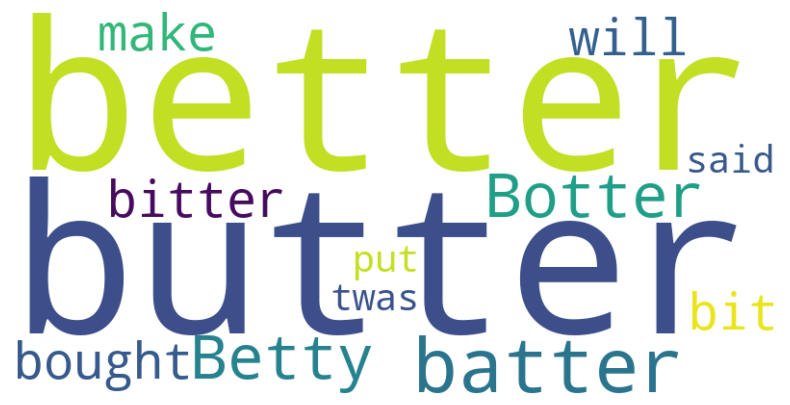

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = """
Betty Botter bought some butter, but she said the butter's bitter. If I put it in my batter, it will make my batter bitter. But a bit of better butter will make my batter better. So 'twas better Betty Botter bought a bit of better butter.
"""

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 2. Bar Plot of Word Frequency

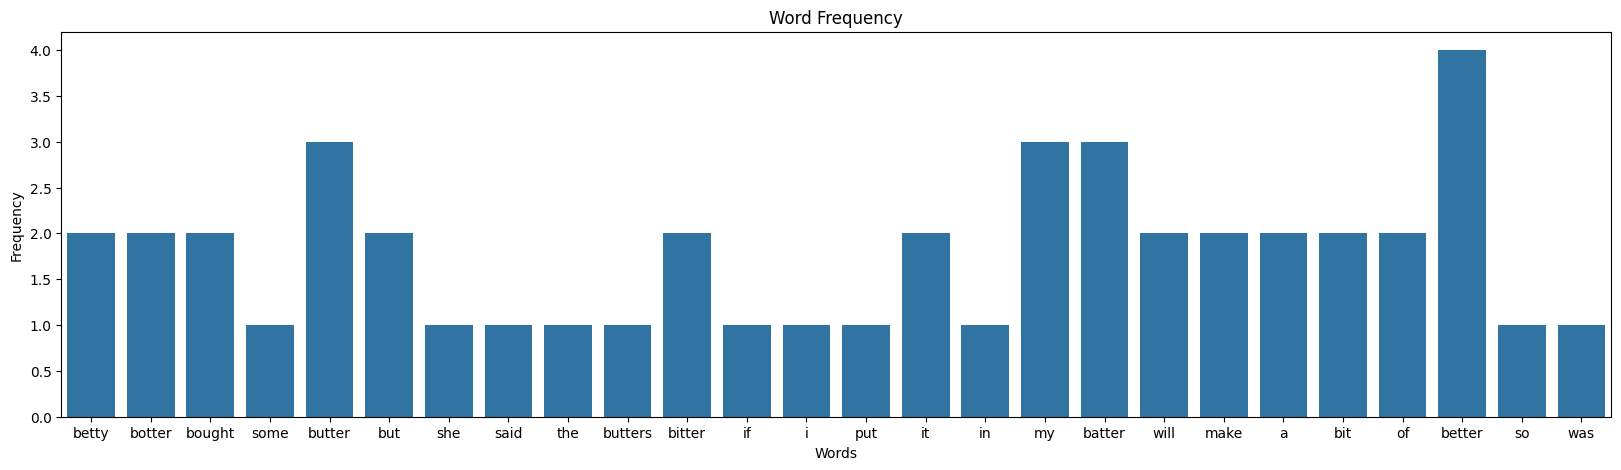

In [29]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

text = re.sub(r"[^A-Za-z0-9\s]", "", text)
text = text.lower()

# Tokenize the text and count word frequencies
words = text.split()
word_freq = Counter(words)

# Convert to DataFrame for easier plotting
df_word_freq = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"])

# Plot bar plot
plt.figure(figsize=(20, 5))
sns.barplot(x="Word", y="Frequency", data=df_word_freq)
plt.title("Word Frequency")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

#### 3. Document-Term Matrix

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

documents = [
    "Data visualization is a graphical representation of information and data.",
    "Data science is an interdisciplinary field.",
    "Visualization helps in understanding complex data.",
]

# Create a document-term matrix
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(documents)
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

print(dtm_df)

   an  and  complex  data  field  graphical  helps  in  information  \
0   0    1        0     2      0          1      0   0            1   
1   1    0        0     1      1          0      0   0            0   
2   0    0        1     1      0          0      1   1            0   

   interdisciplinary  is  of  representation  science  understanding  \
0                  0   1   1               1        0              0   
1                  1   1   0               0        1              0   
2                  0   0   0               0        0              1   

   visualization  
0              1  
1              0  
2              1  


#### 4. Topic Modeling (LDA)

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

documents = [
    "Data visualization is a graphical representation of information and data.",
    "Data science is an interdisciplinary field.",
    "Visualization helps in understanding complex data.",
]

# Create a document-term matrix
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(documents)

# Apply LDA
lda = LatentDirichletAllocation(n_components=2, random_state=0)
lda.fit(dtm)

# Display topics
for index, topic in enumerate(lda.components_):
    print(f"Topic {index+1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 1:
['visualization', 'field', 'an', 'science', 'interdisciplinary', 'in', 'helps', 'understanding', 'complex', 'data']
Topic 2:
['an', 'field', 'representation', 'graphical', 'and', 'information', 'of', 'visualization', 'is', 'data']


#### 5. Sentiment Analysis

In [37]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Sample text data
text = ["Data visualization is amazing.", "I dislike data preprocessing.", "Visualization is very helpful."]

# Analyze sentiment
sentiments = [TextBlob(t).sentiment.polarity for t in text]

# Plot sentiment analysis
plt.figure(figsize=(8, 5))
plt.bar(range(len(text)), sentiments, color=['green' if s > 0 else 'red' for s in sentiments])
plt.xticks(range(len(text)), ['Text1', 'Text2', 'Text3'])
plt.title('Sentiment Analysis')
plt.xlabel('Texts')
plt.ylabel('Sentiment Polarity')
plt.show()


ModuleNotFoundError: No module named 'textblob'

#### 6. Named Entity Recognition (NER)

In [ ]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Load Spacy model
nlp = spacy.load('en_core_web_sm')

# Sample text data
text = "Apple is looking at buying U.K. startup for $1 billion. Steve Jobs founded Apple."

# Process text
doc = nlp(text)

# Extract named entities
entities = [(ent.text, ent.label_) for ent in doc.ents]
entity_freq = Counter([ent[1] for ent in entities])

# Convert to DataFrame for easier plotting
df_entity_freq = pd.DataFrame(entity_freq.items(), columns=['Entity', 'Frequency'])

# Plot NER
plt.figure(figsize=(12, 6))
sns.barplot(x='Entity', y='Frequency', data=df_entity_freq)
plt.title('Named Entity Recognition')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.show()


## Levels of text representations

Text representations can be divided into several levels, each capturing different aspects of the text. These levels range from basic character-level representations to more complex document-level representations. Here are the common levels of text representations:

1. Character-Level Representations
2. Subword-Level Representations
3. Word-Level Representations
4. Phrase-Level Representations
5. Sentence-Level Representations
6. Paragraph-Level Representations
7. Document-Level Representations

#### 1. Character-Level Representations
In this representation, text is broken down into individual characters. This can be useful for tasks where character information is important, such as spelling correction or certain types of language modeling.

In [ ]:
text = "hello"
char_level = list(text)
print(char_level)  # Output: ['h', 'e', 'l', 'l', 'o']


#### 2. Subword-Level Representations
Subword units like Byte Pair Encoding (BPE) or Unigram Language Model are used to represent text at the subword level. This helps in handling rare words and capturing meaningful subword units.

In [ ]:
import sentencepiece as spm

# Train a SentencePiece model (this is just an example, you need a text corpus for actual training)
spm.SentencePieceTrainer.train(input='text_corpus.txt', model_prefix='spm_model', vocab_size=1000)

# Load the trained model
sp = spm.SentencePieceProcessor(model_file='spm_model.model')

# Encode text to subword units
text = "hello world"
subword_level = sp.encode_as_pieces(text)
print(subword_level)  # Output example: ['▁he', 'llo', '▁world']


#### 3. Word-Level Representations
Text is represented as a sequence of words. This is one of the most common levels of text representation and is widely used in various NLP tasks.

In [ ]:
import nltk
nltk.download('punkt')

text = "Hello world"
word_level = nltk.word_tokenize(text)
print(word_level)  # Output: ['Hello', 'world']


#### 4. Phrase-Level Representations
Text is represented as a sequence of phrases. This can be useful for tasks like phrase extraction or chunking.

In [ ]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

text = "Hello world"
word_level = nltk.word_tokenize(text)
tagged = nltk.pos_tag(word_level)
phrases = nltk.ne_chunk(tagged)
print(phrases)  # Output example: (S (GPE Hello) (GPE world))


#### 5. Sentence-Level Representations
Text is represented as a sequence of sentences. This level is useful for tasks like sentence segmentation, sentiment analysis, and more.

In [ ]:
text = "Hello world. How are you?"
sentence_level = nltk.sent_tokenize(text)
print(sentence_level)  # Output: ['Hello world.', 'How are you?']


#### 6. Paragraph-Level Representations
Text is represented as a sequence of paragraphs. This can be useful for document summarization, paragraph segmentation, and more.

In [ ]:
text = "Paragraph 1.\n\nParagraph 2.\n\nParagraph 3."
paragraph_level = text.split('\n\n')
print(paragraph_level)  # Output: ['Paragraph 1.', 'Paragraph 2.', 'Paragraph 3.']


#### 7. Document-Level Representations
Text is represented as a whole document. This is useful for tasks like document classification, topic modeling, and more.

In [ ]:
document = "This is a full document representation. It can be used for document-level tasks."
print(document)


## Visualizing single text document

Visualizing a single text document can be approached in various ways depending on the aspect of the text you want to highlight, such as word frequency, sentiment, named entities, or overall structure. We can use techniques like Word Cloud, Bar plot of word frequency, Sentiment Analysis and Named Entity Recognition

## Flow Data


Flow data visualization, often referred to as flowcharting or process visualization, is used to represent the flow of data or control in a system or process. This type of visualization is crucial for understanding complex systems, workflows, and processes. Here are several techniques and examples for visualizing flow data using Python:

#### Techniques for Flow Data Visualization
1. Flowcharts: Diagrams that represent a process or workflow, typically using standard shapes like rectangles (processes), diamonds (decisions), and arrows (flow direction).
2. Sankey Diagrams: Visualizations that show the flow of quantities between different states or processes.
3. Network Graphs: Graphs that represent nodes and the edges between them, which can be used to show relationships and flow.
4. Gantt Charts: Visualizations that represent project schedules and the flow of tasks over time.

#### 1. Flowchart

In [ ]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph()

# Add nodes and edges
dot.node('A', 'Start')
dot.node('B', 'Process 1')
dot.node('C', 'Decision')
dot.node('D', 'Process 2')
dot.node('E', 'End')

dot.edges(['AB', 'BC', 'CD', 'CE', 'DE'])

# Add decision branches
dot.edge('C', 'D', 'Yes')
dot.edge('C', 'E', 'No')

# Render the graph
dot.render('flowchart', format='png', view=True)


#### 2. Sankey Diagrams

In [ ]:
import plotly.graph_objects as go

# Define nodes and links
nodes = {
    "label": ["Start", "Process 1", "Decision", "Process 2", "End"],
}

links = {
    "source": [0, 1, 2, 2],
    "target": [1, 2, 3, 4],
    "value": [1, 1, 1, 1],
}

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=nodes,
    link=links
))

fig.update_layout(title_text="Sankey Diagram", font_size=10)
fig.show()


#### 3. Network Graph

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
G.add_edges_from([
    ('Start', 'Process 1'),
    ('Process 1', 'Decision'),
    ('Decision', 'Process 2', {'label': 'Yes'}),
    ('Decision', 'End', {'label': 'No'}),
    ('Process 2', 'End')
])

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Flow Network Graph")
plt.show()


#### 4. Gantt Chart

In [ ]:
import plotly.express as px
import pandas as pd

# Sample data
data = {
    'Task': ['Task 1', 'Task 2', 'Task 3'],
    'Start': ['2023-01-01', '2023-01-05', '2023-01-10'],
    'Finish': ['2023-01-10', '2023-01-15', '2023-01-20'],
}

df = pd.DataFrame(data)

# Create the Gantt chart
fig = px.timeline(df, x_start='Start', x_end='Finish', y='Task', title='Gantt Chart')
fig.update_yaxes(categoryorder='total ascending')
fig.show()


## Word Cloud
A word cloud is a visualization technique that displays words from a text document, where the size of each word indicates its frequency or importance.

#### Steps to Create a Word Cloud

1. Install the wordcloud library:

2. Prepare the text data: You can load text data from a file or use a sample text.

3. Generate and display the word cloud: Use the WordCloud class to generate the word cloud and matplotlib to display it.

#### Example Code
Here’s a complete example that demonstrates how to create a word cloud from a sample text:

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text data
text = """
Data visualization is a graphical representation of information and data. 
By using visual elements like charts, graphs, and maps, data visualization tools 
provide an accessible way to see and understand trends, outliers, and patterns in data.
In the world of big data, data visualization tools and technologies are essential to 
analyze massive amounts of information and make data-driven decisions.
"""

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Sample Text')
plt.show()


#### Customizing the Word Cloud
You can customize the appearance of the word cloud using various parameters of the WordCloud class:

1. width and height: Dimensions of the word cloud image.
2. background_color: Background color of the image (e.g., 'white', 'black').
3. colormap: Color map to use for the words (e.g., 'viridis', 'plasma', 'inferno').
4. max_words: Maximum number of words to include in the word cloud.
5. stopwords: A set of words to be excluded from the word cloud.
6. mask: An image mask to shape the word cloud.

#### Example with Customizations
Here’s an example with additional customizations:

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Sample text data
text = """
Data visualization is a graphical representation of information and data. 
By using visual elements like charts, graphs, and maps, data visualization tools 
provide an accessible way to see and understand trends, outliers, and patterns in data.
In the world of big data, data visualization tools and technologies are essential to 
analyze massive amounts of information and make data-driven decisions.
"""

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(["data", "visualization"])

# Generate word cloud with customizations
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='inferno',
                      stopwords=stopwords, max_words=100).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Customized Word Cloud of Sample Text')
plt.show()
